<a href="https://colab.research.google.com/github/oguzsozen/kuzushiji-character-recognition/blob/main/Kuzushiji49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kuzushiji-49 Character Recognition

## First Works

### Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=5c40def0a7dd01ef439479d3eee37c83671e35164e9d669375cba7235b85209c
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import time
import os

### Import Data & Analyze

In [3]:
pathDataset = "/content/drive/MyDrive/Colab Notebooks/datasets/Kuzushiji_Datasets/Kuzushiji49"
files = os.listdir(pathDataset)
files

['k49-test-labels.npz',
 'k49-train-labels.npz',
 'k49-test-imgs.npz',
 'k49-train-imgs.npz',
 'models',
 '.ipynb_checkpoints']

In [4]:
def getdata(filePath):
  data = np.load(filePath)
  return data[data.files[0]]

In [5]:
test_label = getdata(pathDataset + "/" + files[0])
train_label = getdata(pathDataset + "/" + files[1])
test_data = getdata(pathDataset + "/" + files[2])
train_data = getdata(pathDataset + "/" + files[3])

In [6]:
label_names = ['あ','い','う','え','お','か','き','く','け','こ','さ','し','す','せ','そ','た','ち','つ','て','と','な','に','ぬ','ね','の','は','ひ','ふ','へ','ほ','ま','み','む','め','も','や','ゆ','よ','ら','り','る','れ','ろ','わ','ゐ','ゑ','を','ん','ゝ']
len(label_names)

49

In [7]:
def countClassMember(array):
  dict = {}

  for i in range(49):
    dict[label_names[i]] = 0

  for i in array:
    dict[label_names[i]] = dict[label_names[i]] + 1

  return dict

In [8]:
countTrainClassMember = countClassMember(train_label)

print(f"Total class: {len(countTrainClassMember)}", end="\n\n")

for i, (label, count) in enumerate(countTrainClassMember.items()):
  print("{:<2} - {} --> {:<4}".format(i, label, count), end="\t") if (i + 1) % 5 != 0 else print("{:<2} - {} --> {:<4}".format(i, label, count), end="\n\n")

Total class: 49

0  - あ --> 6000	1  - い --> 6000	2  - う --> 6000	3  - え --> 777 	4  - お --> 6000

5  - か --> 6000	6  - き --> 6000	7  - く --> 6000	8  - け --> 4714	9  - こ --> 6000

10 - さ --> 6000	11 - し --> 6000	12 - す --> 6000	13 - せ --> 4165	14 - そ --> 3867

15 - た --> 6000	16 - ち --> 2565	17 - つ --> 6000	18 - て --> 6000	19 - と --> 6000

20 - な --> 6000	21 - に --> 6000	22 - ぬ --> 2063	23 - ね --> 2451	24 - の --> 6000

25 - は --> 6000	26 - ひ --> 5132	27 - ふ --> 6000	28 - へ --> 6000	29 - ほ --> 1993

30 - ま --> 6000	31 - み --> 3060	32 - む --> 1718	33 - め --> 3394	34 - も --> 6000

35 - や --> 6000	36 - ゆ --> 1598	37 - よ --> 6000	38 - ら --> 6000	39 - り --> 6000

40 - る --> 6000	41 - れ --> 6000	42 - ろ --> 2139	43 - わ --> 2397	44 - ゐ --> 417 

45 - ゑ --> 392 	46 - を --> 6000	47 - ん --> 6000	48 - ゝ --> 3523	

In [9]:
countTestClassMember = countClassMember(test_label)

print(f"Total class: {len(countTestClassMember)}", end="\n\n")

for i, (label, count) in enumerate(countTestClassMember.items()):
  print("{:<2} - {} --> {:<4}".format(i, label, count), end="\t") if (i + 1) % 5 != 0 else print("{:<2} - {} --> {:<4}".format(i, label, count), end="\n\n")

Total class: 49

0  - あ --> 1000	1  - い --> 1000	2  - う --> 1000	3  - え --> 126 	4  - お --> 1000

5  - か --> 1000	6  - き --> 1000	7  - く --> 1000	8  - け --> 767 	9  - こ --> 1000

10 - さ --> 1000	11 - し --> 1000	12 - す --> 1000	13 - せ --> 678 	14 - そ --> 629 

15 - た --> 1000	16 - ち --> 418 	17 - つ --> 1000	18 - て --> 1000	19 - と --> 1000

20 - な --> 1000	21 - に --> 1000	22 - ぬ --> 336 	23 - ね --> 399 	24 - の --> 1000

25 - は --> 1000	26 - ひ --> 836 	27 - ふ --> 1000	28 - へ --> 1000	29 - ほ --> 324 

30 - ま --> 1000	31 - み --> 498 	32 - む --> 280 	33 - め --> 552 	34 - も --> 1000

35 - や --> 1000	36 - ゆ --> 260 	37 - よ --> 1000	38 - ら --> 1000	39 - り --> 1000

40 - る --> 1000	41 - れ --> 1000	42 - ろ --> 348 	43 - わ --> 390 	44 - ゐ --> 68  

45 - ゑ --> 64  	46 - を --> 1000	47 - ん --> 1000	48 - ゝ --> 574 	

In [10]:
low_data_class = [(key, value) for (key, value) in countTrainClassMember.items() if value < 6000]
print(len(low_data_class))
low_data_class

18


[('え', 777),
 ('け', 4714),
 ('せ', 4165),
 ('そ', 3867),
 ('ち', 2565),
 ('ぬ', 2063),
 ('ね', 2451),
 ('ひ', 5132),
 ('ほ', 1993),
 ('み', 3060),
 ('む', 1718),
 ('め', 3394),
 ('ゆ', 1598),
 ('ろ', 2139),
 ('わ', 2397),
 ('ゐ', 417),
 ('ゑ', 392),
 ('ゝ', 3523)]

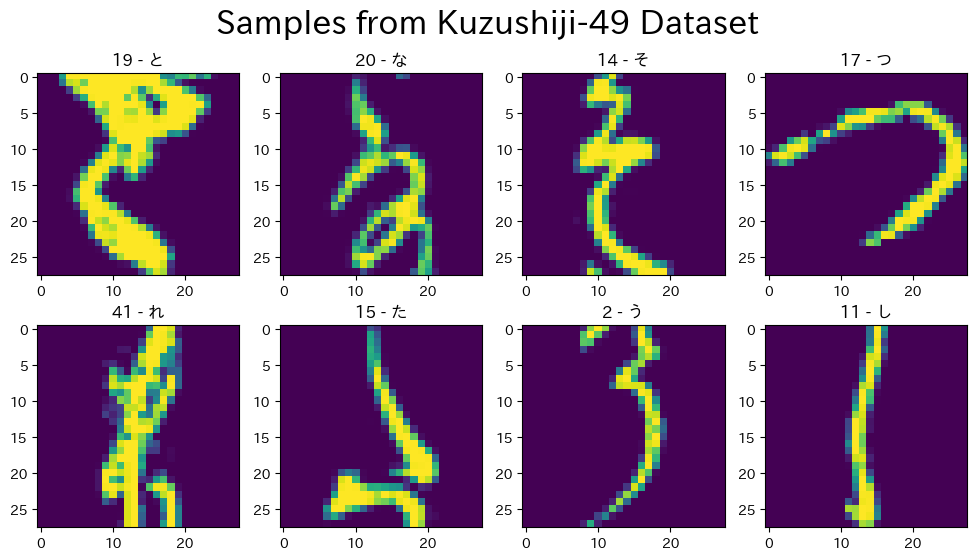

In [11]:
fig, axs = plt.subplots(2, 4)
fig.set_figheight(6)
fig.set_figwidth(12)
fig.suptitle("Samples from Kuzushiji-49 Dataset", fontsize=24)

indexes = [165, 23, 1948, 4063, 8474, 10784, 738, 4942]
row, column = 0, 0
for i in indexes:
  axs[row, column].imshow(train_data[i], interpolation='nearest')
  axs[row, column].set_title("{} - {}".format(train_label[i], label_names[train_label[i]]))
  if column == 3:
    column = 0
    row = row + 1
  else:
    column = column + 1

plt.show()

In [12]:
print(train_data.shape)
print(test_data.shape)

(232365, 28, 28)
(38547, 28, 28)


In [13]:
train_label

array([30, 19, 20, ..., 10, 39, 30], dtype=uint8)

In [14]:
len(set(train_label))

49

In [15]:
print(train_label.shape)
print(test_label.shape)

(232365,)
(38547,)


### Data Preprocessing

In [16]:
train_data = train_data.reshape((232365, 28, 28, 1))
train_data = train_data.astype('float32') /255

In [17]:
test_data = test_data.reshape((38547, 28, 28, 1))
test_data = test_data.astype('float32') /255

In [18]:
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

### Model Developing & Training

In [ ]:
def myModel1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  model.add(layers.Flatten())

  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(49, activation='softmax'))
  return model

In [ ]:
model=myModel1()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 49)                  │           3,185 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,241 (375.94 KB)

 Trainable params: 96,049 (375.19 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='loss',
                                               patience=3,
                                               verbose=1,
                                               restore_best_weights=True)

In [ ]:
history = model.fit(train_data,
          train_label,
          epochs=10,
          batch_size=64,
          callbacks=[early_stopping])

Epoch 1/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7917 - loss: 0.8061
Epoch 2/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9377 - loss: 0.2297
Epoch 3/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9512 - loss: 0.1778
Epoch 4/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9585 - loss: 0.1493
Epoch 5/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9643 - loss: 0.1281
Epoch 6/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9680 - loss: 0.1151
Epoch 7/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9701 - loss: 0.1049
Epoch 8/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9730 - loss: 0.0938
Epoch 9/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9748 - loss: 0.0875
Epoch 10/10
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9765 - loss: 0.0813
Restoring model weights from the end of the best epoch: 10.


In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/datasets/Kuzushiji_Datasets/Kuzushiji49/models/cnn_vanilla_model-1.keras")

### Model Evaluate

In [19]:
model = models.load_model("/content/drive/MyDrive/Colab Notebooks/datasets/Kuzushiji_Datasets/Kuzushiji49/models/cnn_vanilla_model-1.keras")

In [20]:
test_loss, test_acc = model.evaluate(test_data, test_label)

1205/1205 ━━━━━━━━━━━━━━━━━━━━ 67s 48ms/step - accuracy: 0.9192 - loss: 0.3915


In [21]:
test_predict = model.predict(test_data)

1205/1205 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step


In [22]:
test_predict = np.argmax(test_predict, axis = 1)
test_predict

array([19, 23, 10, ...,  1, 27, 47])

In [23]:
test_label = np.argmax(test_label, axis = 1)
test_label

array([19, 23, 10, ...,  1, 27, 47])

In [24]:
print(classification_report(test_label, test_predict, target_names=label_names))

              precision    recall  f1-score   support

           あ       0.95      0.94      0.94      1000
           い       0.97      0.95      0.96      1000
           う       0.92      0.97      0.95      1000
           え       0.81      0.83      0.82       126
           お       0.95      0.91      0.93      1000
           か       0.90      0.87      0.88      1000
           き       0.89      0.92      0.90      1000
           く       0.90      0.91      0.90      1000
           け       0.89      0.89      0.89       767
           こ       0.95      0.88      0.91      1000
           さ       0.99      0.87      0.92      1000
           し       0.90      0.94      0.92      1000
           す       0.89      0.88      0.88      1000
           せ       0.96      0.83      0.89       678
           そ       0.93      0.84      0.88       629
           た       0.92      0.94      0.93      1000
           ち       0.93      0.96      0.95       418
           つ       0.94    

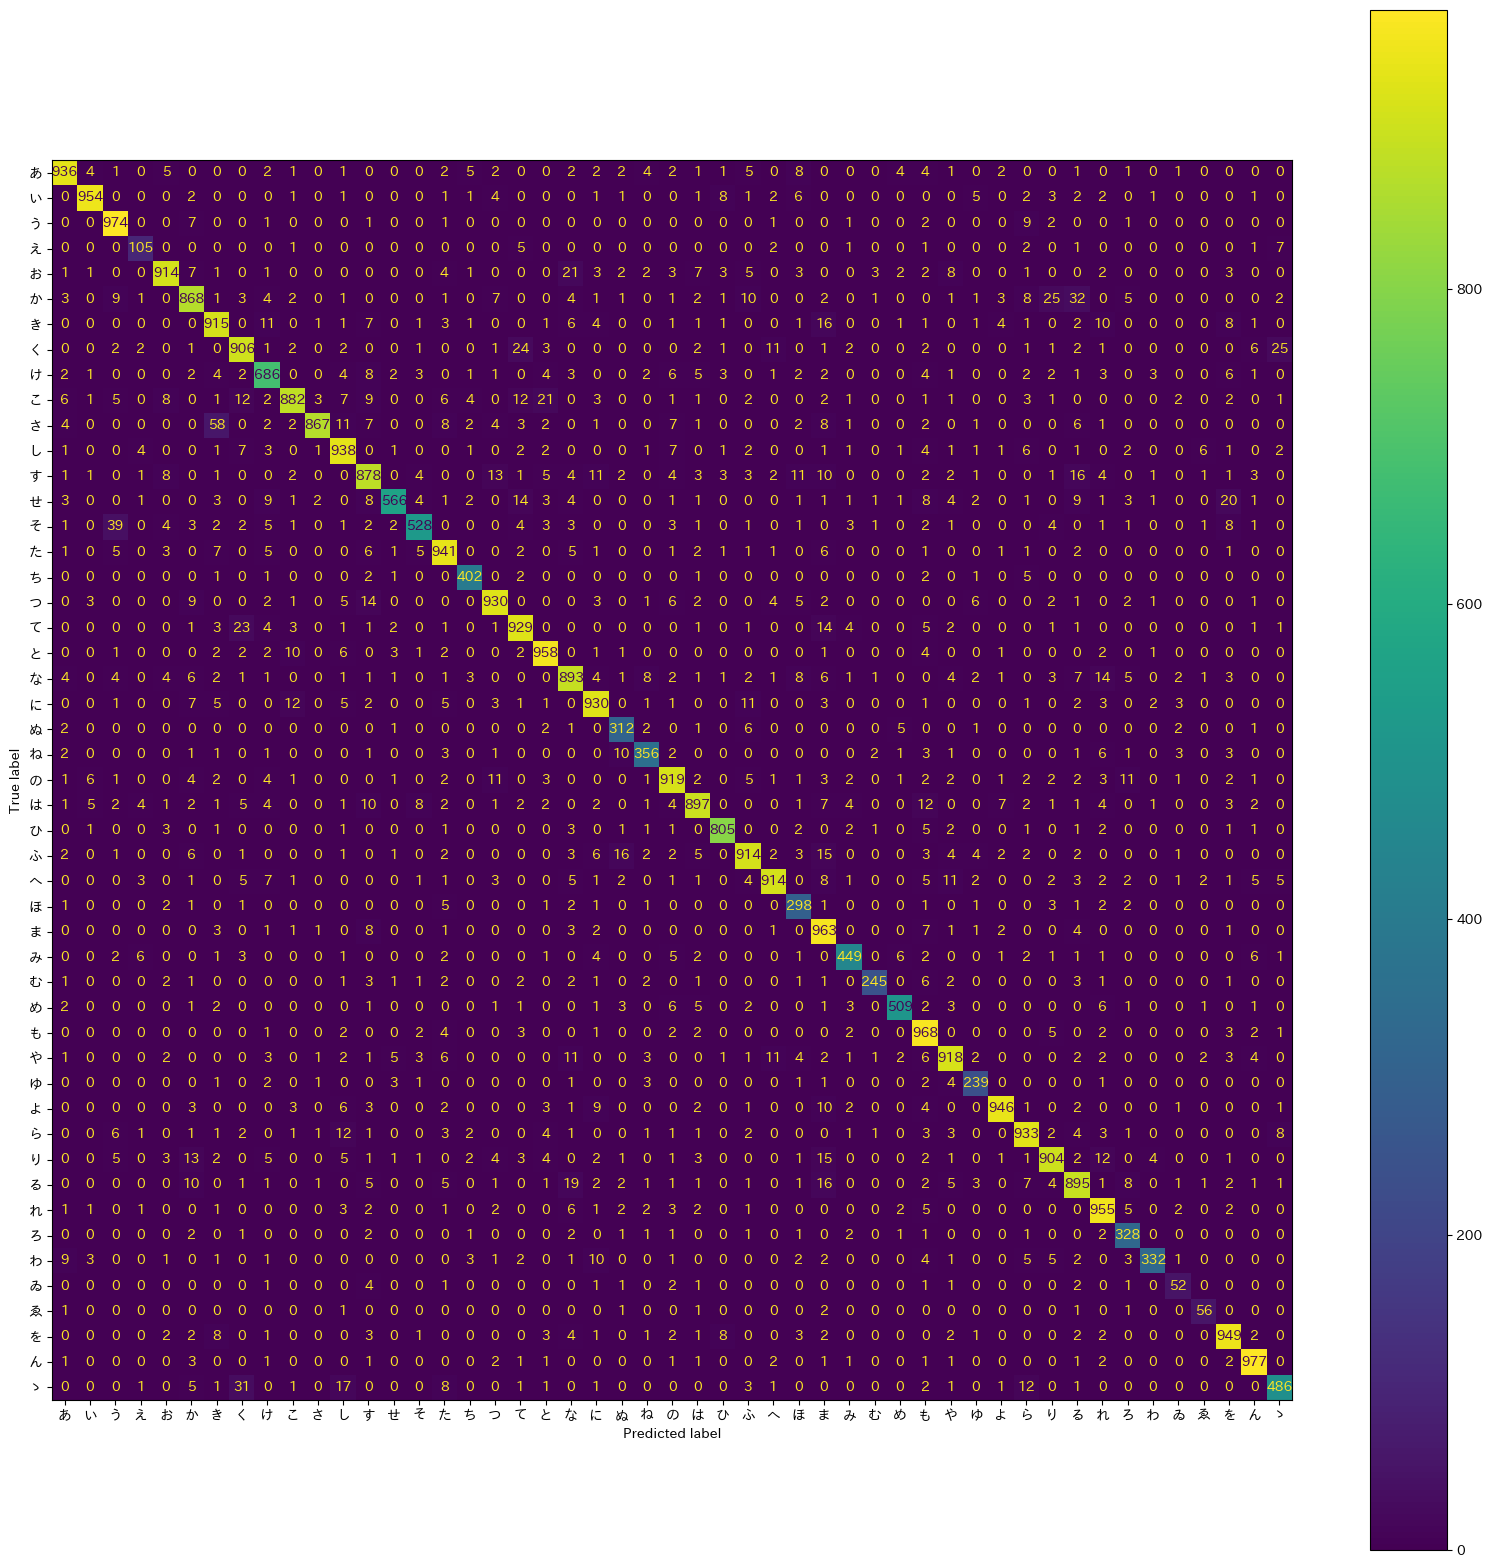

In [25]:
cm = confusion_matrix(test_label, test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names,)

fig, ax = plt.subplots(figsize=(20,20))
disp.plot(ax=ax)

## Second Work

### Data Augmentation: Detection Class of Needs Augmentation

In [26]:
low_data_class = [(key, value) for (key, value) in countTrainClassMember.items() if value < 6000]
print(len(low_data_class))
low_data_class

18


[('え', 777),
 ('け', 4714),
 ('せ', 4165),
 ('そ', 3867),
 ('ち', 2565),
 ('ぬ', 2063),
 ('ね', 2451),
 ('ひ', 5132),
 ('ほ', 1993),
 ('み', 3060),
 ('む', 1718),
 ('め', 3394),
 ('ゆ', 1598),
 ('ろ', 2139),
 ('わ', 2397),
 ('ゐ', 417),
 ('ゑ', 392),
 ('ゝ', 3523)]

In [27]:
low_accurary_class = [(row.split()[0], row.split()[3], row.split()[4]) for row in classification_report(test_label, test_predict, target_names=label_names).split("\n")[2:51] if float(row.split()[3]) < 0.92]
print(len(low_accurary_class))
low_accurary_class

24


[('え', '0.82', '126'),
 ('か', '0.88', '1000'),
 ('き', '0.90', '1000'),
 ('く', '0.90', '1000'),
 ('け', '0.89', '767'),
 ('こ', '0.91', '1000'),
 ('す', '0.88', '1000'),
 ('せ', '0.89', '678'),
 ('そ', '0.88', '629'),
 ('な', '0.89', '1000'),
 ('ぬ', '0.89', '336'),
 ('ね', '0.89', '399'),
 ('は', '0.91', '1000'),
 ('ほ', '0.86', '324'),
 ('ま', '0.91', '1000'),
 ('み', '0.91', '498'),
 ('む', '0.91', '280'),
 ('ゆ', '0.89', '260'),
 ('る', '0.89', '1000'),
 ('ろ', '0.90', '348'),
 ('わ', '0.90', '390'),
 ('ゐ', '0.74', '68'),
 ('ゑ', '0.83', '64'),
 ('ゝ', '0.87', '574')]

In [28]:
low_data_accurary_class = []

for i in low_data_class:
  for j in low_accurary_class:
    if i[0] == j[0]:
      low_data_accurary_class.append(j)

print(len(low_data_accurary_class))
low_data_accurary_class

15


[('え', '0.82', '126'),
 ('け', '0.89', '767'),
 ('せ', '0.89', '678'),
 ('そ', '0.88', '629'),
 ('ぬ', '0.89', '336'),
 ('ね', '0.89', '399'),
 ('ほ', '0.86', '324'),
 ('み', '0.91', '498'),
 ('む', '0.91', '280'),
 ('ゆ', '0.89', '260'),
 ('ろ', '0.90', '348'),
 ('わ', '0.90', '390'),
 ('ゐ', '0.74', '68'),
 ('ゑ', '0.83', '64'),
 ('ゝ', '0.87', '574')]

In [29]:
class_need_augmentation = [i for i in low_data_accurary_class if float(i[1]) < 0.88]
print(len(class_need_augmentation))
class_need_augmentation

5


[('え', '0.82', '126'),
 ('ほ', '0.86', '324'),
 ('ゐ', '0.74', '68'),
 ('ゑ', '0.83', '64'),
 ('ゝ', '0.87', '574')]

In [30]:
class_need_augmentation_indexs = [label_names.index(x[0]) for x in class_need_augmentation]
class_need_augmentation_indexs

[3, 29, 44, 45, 48]

In [31]:
list_augmention_datas = {}

for i in class_need_augmentation_indexs:
  mask = np.zeros(49).astype(bool)
  mask[i] = True

  mask = train_label[:, mask].astype(bool).reshape(-1)
  list_augmention_datas[i] = train_data[mask]

In [32]:
for key, value in list_augmention_datas.items():
  print("{:<2} | {} --> {}".format(key, label_names[key], value.shape))

3  | え --> (777, 28, 28, 1)
29 | ほ --> (1993, 28, 28, 1)
44 | ゐ --> (417, 28, 28, 1)
45 | ゑ --> (392, 28, 28, 1)
48 | ゝ --> (3523, 28, 28, 1)


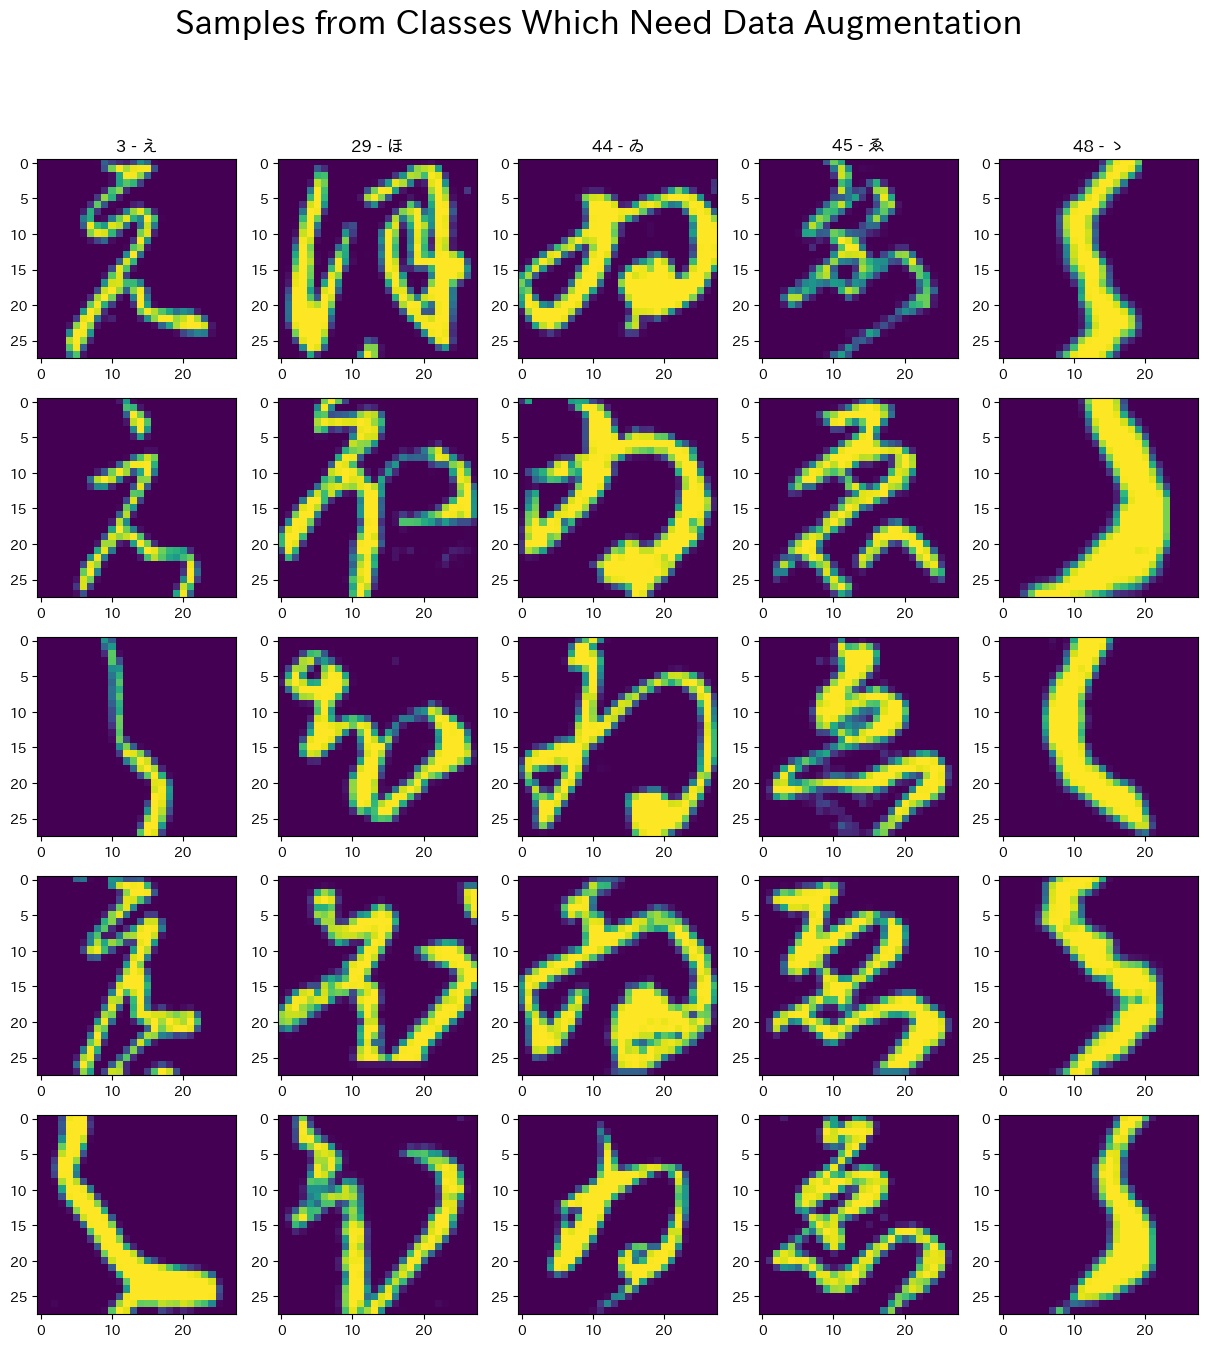

In [33]:
fig, axs = plt.subplots(5, 5)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle("Samples from Classes Which Need Data Augmentation", fontsize=24)

indexes = [165, 23, 225, 19, 335]
row, column = 0, 0
for i, i_class in enumerate(list_augmention_datas):
  for j, value in enumerate(indexes):
    axs[j, i].imshow(list_augmention_datas[i_class][value], interpolation='nearest')
  axs[0, i].set_title("{} - {}".format(i_class, label_names[i_class]))


plt.show()

### Data Augmentation: GAN Model Creating

In [34]:
def modelGAN():

  model_generator = models.Sequential()
  model_generator.add(layers.Dense(7 * 7 * 64, input_shape=(30,)))
  model_generator.add(layers.Reshape((7, 7, 64)))
  model_generator.add(layers.BatchNormalization())
  model_generator.add(layers.Conv2DTranspose(32, (3, 3), (2, 2), 'same', activation="relu"))
  model_generator.add(layers.BatchNormalization())
  model_generator.add(layers.Conv2DTranspose(1, (3, 3), (2, 2), 'same', activation="tanh"))
  model_generator.name = "generator"

  model_discriminator = models.Sequential()
  model_discriminator.add(layers.Conv2D(32, (3, 3), (2, 2), activation=layers.LeakyReLU(0.2), padding='same', input_shape=(28, 28, 1)))
  model_discriminator.add(layers.BatchNormalization())
  model_discriminator.add(layers.Conv2D(64, (3, 3), (2, 2), 'same', activation=layers.LeakyReLU(0.2)))
  model_discriminator.add(layers.BatchNormalization())
  model_discriminator.add(layers.Flatten())
  model_discriminator.add(layers.Dense(1, activation='sigmoid'))
  model_discriminator.name = "discriminator"

  model_gan = models.Sequential([model_generator, model_discriminator])

  return model_gan, model_generator, model_discriminator

In [ ]:
model_gan, model_generator, model_discriminator = modelGAN()

In [36]:
model_gan.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ generator (Sequential)               │ (None, 28, 28, 1)           │         116,353 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ discriminator (Sequential)           │ (None, 1)                   │          22,337 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 138,690 (541.76 KB)

 Trainable params: 138,306 (540.26 KB)

 Non-trainable params: 384 (1.50 KB)

In [37]:
model_generator.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3136)                │          97,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,353 (454.50 KB)

 Trainable params: 116,161 (453.75 KB)

 Non-trainable params: 192 (768.00 B)

In [38]:
model_discriminator.summary()

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           3,137 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,337 (87.25 KB)

 Trainable params: 22,145 (86.50 KB)

 Non-trainable params: 192 (768.00 B)

In [51]:
def progressBar(progress, max_limit, time = None):
  num_bar = 50
  percentage = int((num_bar / max_limit) * progress)
  print("\r", end="")
  if percentage == num_bar:
    print("[{}]".format("-" * percentage), end="")
  elif percentage == 0:
    print("[{}] {:.0f}s".format("." * num_bar, time), end="")
  else:
    print("[{}>{}] {:.0f}s".format("-" * (percentage - 1), "." * (num_bar - percentage), time), end="")

In [78]:
def seeProcess(images):
  fig, axs = plt.subplots(1, len(images))
  fig.set_figheight(1)
  fig.set_figwidth(len(images))

  for i, image in enumerate(images):
    axs[i].imshow(image, interpolation='nearest')

  plt.show()

In [59]:
def trainModelGAN(model_gan, dataset_train, batch_size, codings_size, epochs):
  model_generator, model_discriminator = model_gan.layers

  for epoch in range(epochs):
    print("Epoch {:>2}/{}".format(epoch + 1, epochs))
    start = time.time()

    for progress, X_batch in enumerate(dataset_train):
      progressBar(progress, len(dataset_train), time.time() - start)

      noise = tf.random.normal(shape=[batch_size, codings_size])
      generated_images = model_generator(noise)

      X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
      y_disc = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
      model_discriminator.trainable = True

      model_discriminator.train_on_batch(X_fake_and_real, y_disc)

      noise = tf.random.normal(shape=[batch_size, codings_size])
      y_gan = tf.constant([[1.]] * batch_size)
      model_discriminator.trainable = False

      model_gan.train_on_batch(noise, y_gan)

    progressBar(len(dataset_train), len(dataset_train))

    end = time.time()
    length = end - start
    print("   ---   {:.0f} seconds".format(length))

    if (epoch + 1) % 3 == 0:
      noise = tf.random.normal(shape=[5, codings_size])
      generated_images = model_generator(noise)
      seeProcess(generated_images)

In [41]:
def mainTrain(dataset, batch_size, codings_size, epochs):
  model_gan, model_generator, model_discriminator = modelGAN()

  model_discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
  model_discriminator.trainable = False
  model_gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

  dataset_train = tf.data.Dataset.from_tensor_slices(dataset).shuffle(1000)
  dataset_train = dataset_train.batch(batch_size, drop_remainder=True).prefetch(1)

  trainModelGAN(model_gan, dataset_train, batch_size, codings_size, epochs)

  return model_gan

Epoch  1/50
[--------------------------------------------------]   ---   18 seconds
Epoch  2/50
[--------------------------------------------------]   ---   16 seconds
Epoch  3/50
[--------------------------------------------------]   ---   16 seconds


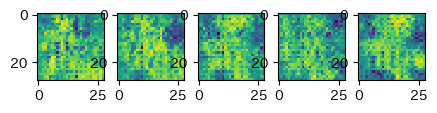

Epoch  4/50
[--------------------------------------------------]   ---   20 seconds
Epoch  5/50
[--------------------------------------------------]   ---   17 seconds
Epoch  6/50
[--------------------------------------------------]   ---   17 seconds


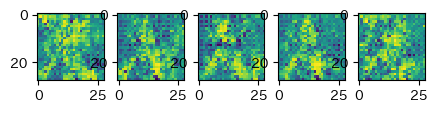

Epoch  7/50
[--------------------------------------------------]   ---   17 seconds
Epoch  8/50
[--------------------------------------------------]   ---   17 seconds
Epoch  9/50
[--------------------------------------------------]   ---   20 seconds


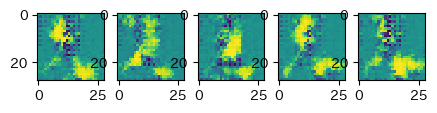

Epoch 10/50
[--------------------------------------------------]   ---   17 seconds
Epoch 11/50
[--------------------------------------------------]   ---   18 seconds
Epoch 12/50
[--------------------------------------------------]   ---   18 seconds


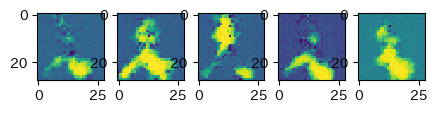

Epoch 13/50
[--------------------------------------------------]   ---   19 seconds
Epoch 14/50
[--------------------------------------------------]   ---   19 seconds
Epoch 15/50
[--------------------------------------------------]   ---   18 seconds


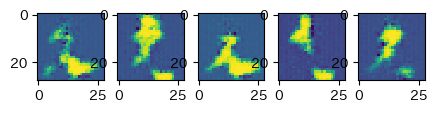

Epoch 16/50
[--------------------------------------------------]   ---   20 seconds
Epoch 17/50
[--------------------------------------------------]   ---   19 seconds
Epoch 18/50
[--------------------------------------------------]   ---   19 seconds


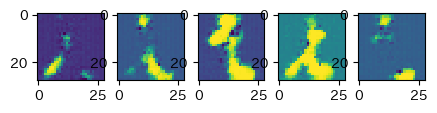

Epoch 19/50
[--------------------------------------------------]   ---   20 seconds
Epoch 20/50
[--------------------------------------------------]   ---   20 seconds
Epoch 21/50
[--------------------------------------------------]   ---   19 seconds


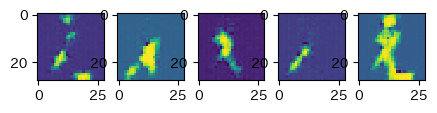

Epoch 22/50
[--------------------------------------------------]   ---   22 seconds
Epoch 23/50
[--------------------------------------------------]   ---   20 seconds
Epoch 24/50
[--------------------------------------------------]   ---   41 seconds


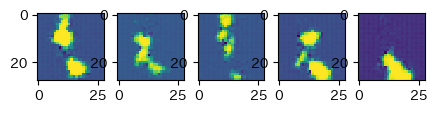

Epoch 25/50
[--------------------------------------------------]   ---   20 seconds
Epoch 26/50
[--------------------------------------------------]   ---   23 seconds
Epoch 27/50
[--------------------------------------------------]   ---   41 seconds


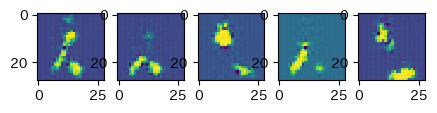

Epoch 28/50
[--------------------------------------------------]   ---   22 seconds
Epoch 29/50
[--------------------------------------------------]   ---   24 seconds
Epoch 30/50
[--------------------------------------------------]   ---   21 seconds


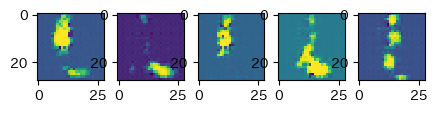

Epoch 31/50
[--------------------------------------------------]   ---   24 seconds
Epoch 32/50
[----->............................................] 2s

KeyboardInterrupt: 

In [80]:
model_gan = mainTrain(dataset=list(list_augmention_datas.values())[0],
                      batch_size=32,
                      codings_size=30,
                      epochs=50)